# Pre Lockdown Data Analysis (2019 - 2020)

In [1]:
# Importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading dataset

df1 = pd.read_csv(r"C:\Users\shivh\Desktop\data analysis\2019_aqi.txt")

In [3]:
# Exploring dataset

df1.head()

,Date,Country,City,Specie,count,min,max,median,variance
0,16-01-2019,AE,Abu Dhabi,pm10,24,86.0,99.0,97.0,179.40
1,22-01-2019,AE,Abu Dhabi,pm10,24,51.0,57.0,55.0,23.75
2,26-01-2019,AE,Abu Dhabi,pm10,24,136.0,173.0,160.0,941.96
3,07-01-2019,AE,Abu Dhabi,pm10,24,60.0,91.0,72.0,1006.88
4,10-01-2019,AE,Abu Dhabi,pm10,24,82.0,93.0,87.0,57.97


In [4]:
# Selecting indian cities

df1= df1[df1.Country == "IN"]
df1

,Date,Country,City,Specie,count,min,max,median,variance
56186,25-01-2019,IN,New Delhi,temperature,24,8.1,16.5,10.9,70.07
56187,15-03-2019,IN,New Delhi,temperature,24,11.2,23.3,15.5,199.22
56188,05-01-2019,IN,New Delhi,temperature,24,7.6,15.3,10.8,82.07
56189,19-01-2019,IN,New Delhi,temperature,24,8.0,20.1,10.7,194.17
56190,21-03-2019,IN,New Delhi,temperature,24,15.6,28.5,19.3,219.36
...,...,...,...,...,...,...,...,...,...
74008,31-03-2019,IN,Kolkata,humidity,115,55.5,96.7,79.5,1246.90
74009,18-01-2019,IN,Kolkata,humidity,120,31.9,96.3,67.0,4008.76
74010,19-02-2019,IN,Kolkata,humidity,120,26.1,95.4,63.9,4441.72
74011,11-03-2019,IN,Kolkata,humidity,120,43.7,98.0,75.1,2249.75


In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17827 entries, 56186 to 74012
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      17827 non-null  object 
 1   Country   17827 non-null  object 
 2   City      17827 non-null  object 
 3   Specie    17827 non-null  object 
 4   count     17827 non-null  int64  
 5   min       17827 non-null  float64
 6   max       17827 non-null  float64
 7   median    17827 non-null  float64
 8   variance  17827 non-null  float64
dtypes: float64(4), int64(1), object(4)
memory usage: 1.4+ MB


In [6]:
df1.City.nunique()

19

###### We can observe that we had a total of 100+ Air Quality Index data scraped from different cities across India ! 
###### Total Distinct Count  -- 19 Cities


In [7]:
df1.Specie.value_counts()

temperature      1695
humidity         1695
pm25             1685
dew              1636
so2              1633
no2              1633
wind-speed       1633
co               1619
o3               1616
pressure         1517
pm10             1177
wind-gust         179
wd                 91
precipitation      18
Name: Specie, dtype: int64

In [8]:
#dropping unnecessary rows

df1 = df1.set_index('Specie')
df1 = df1.drop(['humidity','dew','wind-speed','o3','pm10','pressure','co',
         'wind-gust','wd','precipitation'], axis = 0)

In [9]:
df1.reset_index(inplace=True)

In [10]:
df1.Specie.value_counts()

temperature    1695
pm25           1685
so2            1633
no2            1633
Name: Specie, dtype: int64

In [11]:
#Changing data type of Date from object to datetime

df1.Date = pd.to_datetime(df1.Date,)

In [12]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6646 entries, 0 to 6645
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Specie    6646 non-null   object        
 1   Date      6646 non-null   datetime64[ns]
 2   Country   6646 non-null   object        
 3   City      6646 non-null   object        
 4   count     6646 non-null   int64         
 5   min       6646 non-null   float64       
 6   max       6646 non-null   float64       
 7   median    6646 non-null   float64       
 8   variance  6646 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(3)
memory usage: 467.4+ KB


In [13]:
#dropping unnecessary columns

df1 = df1.drop(['count','variance'], axis = 1)

In [14]:
df1

,Specie,Date,Country,City,min,max,median
0,temperature,2019-01-25,IN,New Delhi,8.1,16.5,10.9
1,temperature,2019-03-15,IN,New Delhi,11.2,23.3,15.5
2,temperature,2019-05-01,IN,New Delhi,7.6,15.3,10.8
3,temperature,2019-01-19,IN,New Delhi,8.0,20.1,10.7
4,temperature,2019-03-21,IN,New Delhi,15.6,28.5,19.3
...,...,...,...,...,...,...,...
6641,no2,2019-02-22,IN,Kolkata,7.8,106.9,24.3
6642,no2,2019-05-03,IN,Kolkata,6.4,58.6,17.8
6643,no2,2019-03-13,IN,Kolkata,6.5,83.6,15.8
6644,no2,2019-03-24,IN,Kolkata,12.1,103.6,32.9


In [15]:
#pivoting the table

df1 = pd.pivot_table(df1,index=['Date', 'City','Country'], columns = 'Specie')

In [16]:
df1

max                          median  \
Specie                                   no2   pm25   so2 temperature    no2   
Date       City               Country                                          
2018-12-31 Bengaluru          IN        54.9  834.0  18.6        30.3   16.1   
           Bhopal             IN        30.4  203.0  42.0        30.9   14.9   
           Chandigarh         IN        12.5  196.0   4.9        22.1    9.0   
           Chennai            IN         9.2  191.0  33.6        28.1    5.2   
           Delhi              IN       117.9  923.0  43.9        49.9   31.5   
...                                      ...    ...   ...         ...    ...   
2019-12-03 Nashik             IN        32.2  152.0  26.8        33.0    7.3   
           New Delhi          IN         NaN    NaN   NaN        23.7    NaN   
           Patna              IN        51.7  242.0  21.0        32.7    9.0   
           Thiruvananthapuram IN         4.4  143.0   4.6        33.2    2.2   
           Visakhapatnam      IN        37.3  148.0  38.8        29.7   23.4   

                                                                 min         \
Specie                                  pm25   so2 temperature   no2   pm25   
Date       City               Country                                         
2018-12-31 Bengaluru          IN       148.0   2.4        23.8   3.0    2.0   
           Bhopal             IN       162.0  10.9        29.8   2.1   70.0   
           Chandigarh         IN       168.0   2.2        14.3   5.3  150.0   
           Chennai            IN       132.0   5.8        25.1   0.1   61.0   
           Delhi              IN       363.0   8.3        12.3   2.2  151.0   
...                                      ...   ...         ...   ...    ...   
2019-12-03 Nashik             IN       132.0   2.4        21.4   3.2   83.0   
           New Delhi          IN         NaN   NaN        15.7   NaN    NaN   
           Patna              IN       169.0  10.8        30.8   7.0   59.0   
           Thiruvananthapuram IN        99.0   1.5        30.1   0.8   81.0   
           Visakhapatnam      IN        82.0   9.2        28.7  12.8   49.0   

                                                        
Specie                                 so2 temperature  
Date       City               Country                   
2018-12-31 Bengaluru          IN       0.5        15.0  
           Bhopal             IN       4.5        29.3  
           Chandigarh         IN       0.9        12.2  
           Chennai            IN       1.4        22.0  
           Delhi              IN       0.2         0.9  
...                                    ...         ...  
2019-12-03 Nashik             IN       0.8        17.4  
           New Delhi          IN       NaN        12.1  
           Patna              IN       2.5        27.4  
           Thiruvananthapuram IN       0.5        29.9  
           Visakhapatnam      IN       2.8        27.2  

[1695 rows x 12 columns]

In [17]:
df1 =  (df1.iloc[:, df1.columns.get_level_values(0)=='median'])
df1["no2"] = df1.iloc[:, df1.columns.get_level_values(1)=='no2']
df1["pm25"] = df1.iloc[:, df1.columns.get_level_values(1)=='pm25']
df1["so2"] = df1.iloc[:, df1.columns.get_level_values(1)=='so2']
df1["temperature"] = df1.iloc[:, df1.columns.get_level_values(1)=='temperature']
df1

median                            no2  \
Specie                                   no2   pm25   so2 temperature         
Date       City               Country                                         
2018-12-31 Bengaluru          IN        16.1  148.0   2.4        23.8  16.1   
           Bhopal             IN        14.9  162.0  10.9        29.8  14.9   
           Chandigarh         IN         9.0  168.0   2.2        14.3   9.0   
           Chennai            IN         5.2  132.0   5.8        25.1   5.2   
           Delhi              IN        31.5  363.0   8.3        12.3  31.5   
...                                      ...    ...   ...         ...   ...   
2019-12-03 Nashik             IN         7.3  132.0   2.4        21.4   7.3   
           New Delhi          IN         NaN    NaN   NaN        15.7   NaN   
           Patna              IN         9.0  169.0  10.8        30.8   9.0   
           Thiruvananthapuram IN         2.2   99.0   1.5        30.1   2.2   
           Visakhapatnam      IN        23.4   82.0   9.2        28.7  23.4   

                                        pm25   so2 temperature  
Specie                                                          
Date       City               Country                           
2018-12-31 Bengaluru          IN       148.0   2.4        23.8  
           Bhopal             IN       162.0  10.9        29.8  
           Chandigarh         IN       168.0   2.2        14.3  
           Chennai            IN       132.0   5.8        25.1  
           Delhi              IN       363.0   8.3        12.3  
...                                      ...   ...         ...  
2019-12-03 Nashik             IN       132.0   2.4        21.4  
           New Delhi          IN         NaN   NaN        15.7  
           Patna              IN       169.0  10.8        30.8  
           Thiruvananthapuram IN        99.0   1.5        30.1  
           Visakhapatnam      IN        82.0   9.2        28.7  

[1695 rows x 8 columns]

In [18]:
#dropping unnecessary columns

df1 = df1.drop(['no2',"pm25","so2","temperature"], axis=1, level=1).reset_index()
df1

,Date,City,Country,no2,pm25,so2,temperature
Specie,,,,,,,
0,2018-12-31,Bengaluru,IN,16.1,148.0,2.4,23.8
1,2018-12-31,Bhopal,IN,14.9,162.0,10.9,29.8
2,2018-12-31,Chandigarh,IN,9.0,168.0,2.2,14.3
3,2018-12-31,Chennai,IN,5.2,132.0,5.8,25.1
4,2018-12-31,Delhi,IN,31.5,363.0,8.3,12.3
...,...,...,...,...,...,...,...
1690,2019-12-03,Nashik,IN,7.3,132.0,2.4,21.4
1691,2019-12-03,New Delhi,IN,NaN,NaN,NaN,15.7
1692,2019-12-03,Patna,IN,9.0,169.0,10.8,30.8


In [19]:
df1.describe()

,no2,pm25,so2,temperature
Specie,,,,
count,1633.000000,1685.000000,1633.000000,1695.000000
mean,16.625781,155.371513,7.276914,24.794159
std,11.183735,58.794831,6.254519,5.955764
min,1.400000,27.000000,0.500000,8.200000
25%,9.000000,115.000000,2.800000,19.800000
50%,14.000000,153.000000,5.200000,26.800000
75%,21.900000,173.000000,9.500000,29.600000
max,84.000000,428.000000,48.100000,34.400000


In [20]:
#Checking Errors in City Names

df1.City.unique()

array(['Bengaluru', 'Bhopal', 'Chandigarh', 'Chennai', 'Delhi',
       'Gandhinagar', 'Gh?zi?b?d', 'H?pur', 'Hyderabad', 'Jaipur',
       'Kolkata', 'Lucknow', 'Mumbai', 'Muzaffarnagar', 'Nashik',
       'New Delhi', 'Patna', 'Thiruvananthapuram', 'Visakhapatnam'],
      dtype=object)

In [21]:
#Correcting Errors in City Column

df1 = df1.replace(['Gh?zi?b?d'],'Ghaziabad').replace(['H?pur'],'Hapur')
df1.City.unique()

array(['Bengaluru', 'Bhopal', 'Chandigarh', 'Chennai', 'Delhi',
       'Gandhinagar', 'Ghaziabad', 'Hapur', 'Hyderabad', 'Jaipur',
       'Kolkata', 'Lucknow', 'Mumbai', 'Muzaffarnagar', 'Nashik',
       'New Delhi', 'Patna', 'Thiruvananthapuram', 'Visakhapatnam'],
      dtype=object)

### 
### Data Visualization

In [22]:
# Avg. So2 concentration in a city

state_wise_max_so2 = df1[['City','so2']].dropna().groupby(by = 'City').median().sort_values(by='so2')
state_wise_max_so2

,so2
Specie,
City,
Thiruvananthapuram,1.90
Nashik,2.30
Bengaluru,2.50
Hyderabad,2.50
Chandigarh,2.70
Chennai,3.30
Lucknow,4.00
Visakhapatnam,4.40


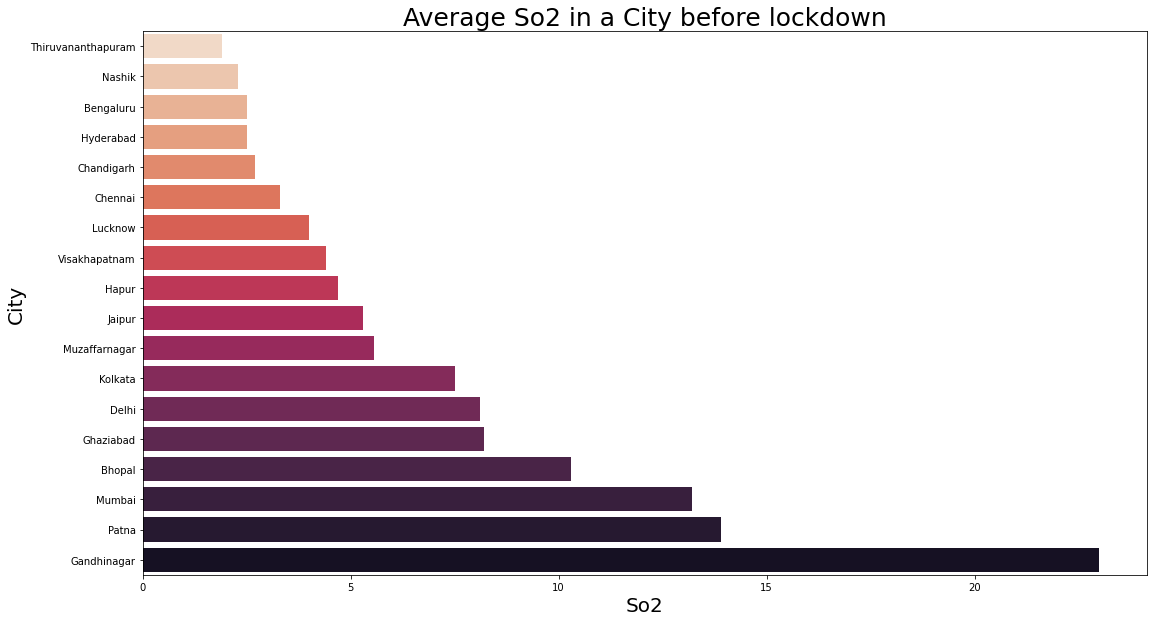

In [23]:
fig= plt.figure(figsize=(18, 10))
sns.barplot(x='so2', y=state_wise_max_so2.index, data=state_wise_max_so2, palette = 'rocket_r')
plt.title("Average So2 in a City before lockdown",fontsize = 25)
plt.xlabel("So2",fontsize = 20)
plt.ylabel("City",fontsize = 20)
plt.show()

##### As we can see above “Gandhinagar” (Gujarat) is way ahead in avg So2 count (23) ppbv before the Covid-19 lockdown followed by “Patna” (Bihar) (13.90) ppbv and the metro city “Mumbai”(Maharashtra)(13.20)ppbv
##### Ppbv – Parts per Billion Volume (Unit for measuring air quality)


In [24]:
df1[['City','no2']].dropna().groupby(by = 'City').median().sort_values(by='no2')

,no2
Specie,
City,
Thiruvananthapuram,2.8
Chennai,5.3
Patna,7.6
Chandigarh,9.7
Nashik,10.4
Bhopal,11.6
Bengaluru,11.9
Jaipur,12.2


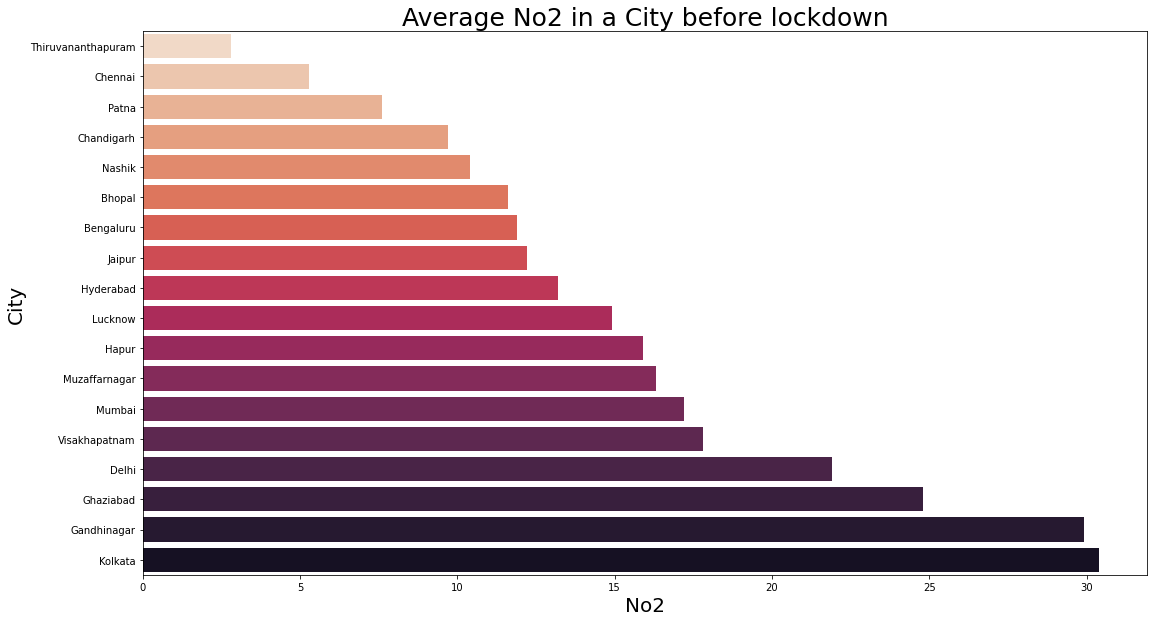

In [25]:
# Avg. No2 concentration in a city

state_wise_max_no2 = df1[['City','no2']].dropna().groupby(by = 'City').median().sort_values(by='no2')
fig= plt.figure(figsize=(18, 10))
sns.barplot(x='no2', y=state_wise_max_no2.index, data=state_wise_max_no2, palette = 'rocket_r')
plt.title("Average No2 in a City before lockdown",fontsize = 25)
plt.xlabel("No2",fontsize = 20)
plt.ylabel("City",fontsize = 20)
plt.show()

###### As we can see above “Kolkata” (West Bengal) is way ahead in avg So2 count (30.4) ppbv before the Covid-19 lockdown followed by “Gandhinagar” (Gujarat) (29.9) ppbv and not shocking “Ghaziabad”(Uttar Pradesh)(24.8)ppbv


In [26]:
df1[['City','pm25']].dropna().groupby(by = 'City').median().sort_values(by='pm25')

,pm25
Specie,
City,
Chennai,94.0
Thiruvananthapuram,105.5
Chandigarh,111.0
Jaipur,114.0
Nashik,119.0
Bengaluru,125.0
Bhopal,144.0
Visakhapatnam,148.0


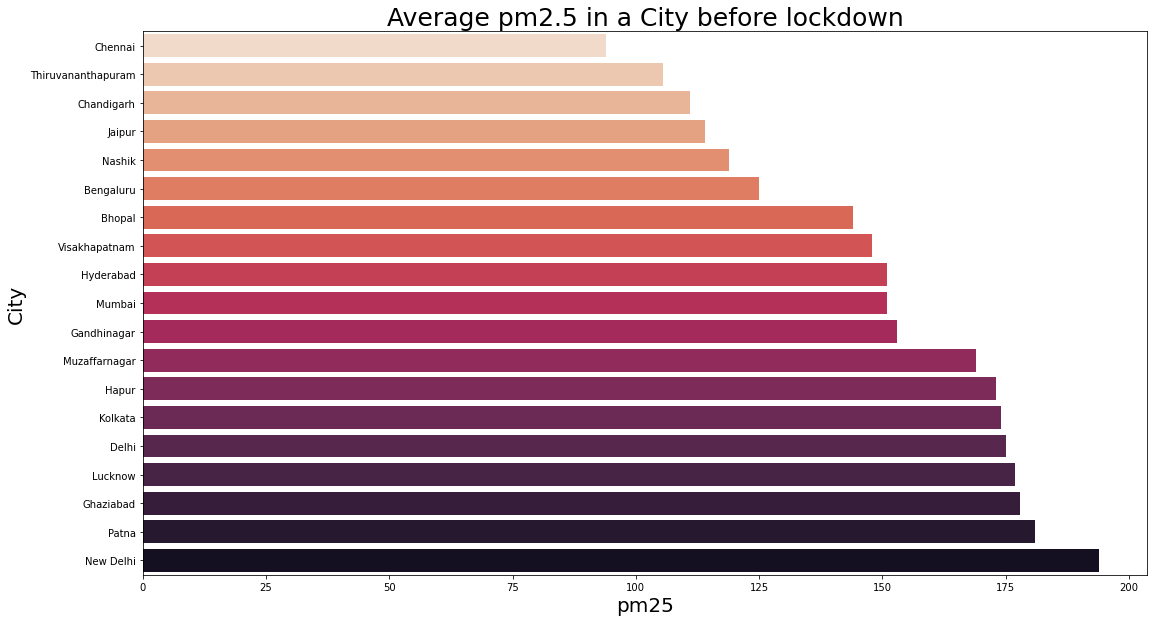

In [27]:
# Avg. pm25 concentration in a city

state_wise_max_pm25 = df1[['City','pm25']].dropna().groupby(by = 'City').median().sort_values(by='pm25')
fig= plt.figure(figsize=(18, 10))
sns.barplot(x='pm25', y=state_wise_max_pm25.index, data=state_wise_max_pm25, palette = 'rocket_r')
plt.title("Average pm2.5 in a City before lockdown",fontsize = 25)
plt.xlabel("pm25",fontsize = 20)
plt.ylabel("City",fontsize = 20)
plt.show()

##### As we can see above “New Delhi”  tops the chart with avg count of 194  ppbv followed by again “Patna”(Bihar) with 181 and not shocking ‘Ghaziabad’(Uttar Pradesh) with 178
##### Since the respiratory affect depends on the pm2.5 therefore New Delhi is worst city according to respiration point of view

### Conclusion
##### These are the insights  before lockdown. As these were the cases around the Cities before lockdown period , many cities already were in bad condition ! The north-west states were Bad .Many measures were taken after the lockdown to decrease the pollution and YES, maybe we have succeded to decrease the count of pollutant 
##### Conc. of So2 and No2 in Gandhinagar though being Shri Narendra Modi’s Hometown , pollution never decreased ! and Delhi (The capital of India) stood out in Pm2.5 with humongous 195+ ppbv , making it the worst respiratory affected city!
##### Now look at the after lockdown period (2020-2021)


# Post Lockdown Data Analysis (2020 - 2021)

In [28]:
df2 = pd.read_csv(r"C:\Users\shivh\Desktop\data analysis\2020_aiq.csv")
df2[df2.Country == "IN"]

,Date,Country,City,Specie,count,min,max,median,variance
329773,01-02-2020,IN,Thrissur,so2,24.0,1.0,3.7,2.4,5.10
329774,06-03-2020,IN,Thrissur,so2,24.0,1.2,4.3,2.7,10.82
329775,17-03-2020,IN,Thrissur,so2,24.0,1.2,4.3,2.4,8.24
329776,19-03-2020,IN,Thrissur,so2,24.0,1.4,4.6,2.6,8.55
329777,17-04-2020,IN,Thrissur,so2,72.0,1.6,9.8,2.9,98.69
...,...,...,...,...,...,...,...,...,...
363046,02-02-2020,IN,Kolkata,pressure,224.0,1012.1,1020.0,1015.1,32.01
363047,25-03-2020,IN,Kolkata,pressure,264.0,1001.7,1011.0,1005.3,31.96
363048,15-05-2020,IN,Kolkata,pressure,216.0,996.9,1006.0,1001.1,39.41
363049,09-02-2020,IN,Kolkata,pressure,99.0,1013.4,1021.0,1016.5,30.03


In [29]:
df2['Date'] = pd.to_datetime(df2.Date)
df2 = df2[df2.Country == "IN"]
df2 = df2[df2.Date > '2020-02-5'].sort_values(by = 'Date')
df2

,Date,Country,City,Specie,count,min,max,median,variance
347041,2020-02-13,IN,Nashik,so2,18.0,0.4,61.7,1.5,2019.93
334538,2020-02-13,IN,Delhi,o3,875.0,0.6,75.1,10.0,1417.70
360125,2020-02-13,IN,Shillong,so2,48.0,3.2,21.8,5.3,81.28
341351,2020-02-13,IN,Gh?zi?b?d,so2,48.0,5.9,70.5,8.9,819.32
354429,2020-02-13,IN,Patna,pm10,72.0,97.0,297.0,120.0,8787.59
...,...,...,...,...,...,...,...,...,...
351702,2020-12-05,IN,Mumbai,humidity,215.0,32.6,99.9,81.0,2012.18
345564,2020-12-05,IN,Chennai,temperature,96.0,28.1,36.0,31.0,42.72
341100,2020-12-05,IN,Gh?zi?b?d,no2,46.0,4.1,17.6,11.2,113.40
358545,2020-12-05,IN,Thiruvananthapuram,pressure,48.0,753.0,1009.0,756.0,162613.00


In [30]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26058 entries, 347041 to 353188
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      26058 non-null  datetime64[ns]
 1   Country   26058 non-null  object        
 2   City      26058 non-null  object        
 3   Specie    26058 non-null  object        
 4   count     26058 non-null  float64       
 5   min       26058 non-null  float64       
 6   max       26058 non-null  float64       
 7   median    26058 non-null  float64       
 8   variance  26058 non-null  float64       
dtypes: datetime64[ns](1), float64(5), object(3)
memory usage: 2.0+ MB


In [31]:
df2.isnull().sum()

Date        0
Country     0
City        0
Specie      0
count       0
min         0
max         0
median      0
variance    0
dtype: int64

In [32]:
df2.City.nunique()

23

##### We can observe that we had a total of 140+ Air Quality Index data scraped from different cities across India !
##### Total Distinct Count  -- 23 Cities

In [33]:
df2.City.unique()

array(['Nashik', 'Delhi', 'Shillong', 'Gh?zi?b?d', 'Patna', 'Nagpur',
       'Jaipur', 'Thiruvananthapuram', 'Bhopal', 'Kolkata', 'Chandigarh',
       'Thrissur', 'Muzaffarnagar', 'H?pur', 'Hyderabad', 'Bengaluru',
       'Chennai', 'Mumbai', 'Gandhinagar', 'Visakhapatnam', 'New Delhi',
       'Lucknow', 'Mysore'], dtype=object)

In [34]:
df2 = df2.replace(['Gh?zi?b?d'],'Ghaziabad').replace(['H?pur'],'Hapur')
df2.City.unique()

array(['Nashik', 'Delhi', 'Shillong', 'Ghaziabad', 'Patna', 'Nagpur',
       'Jaipur', 'Thiruvananthapuram', 'Bhopal', 'Kolkata', 'Chandigarh',
       'Thrissur', 'Muzaffarnagar', 'Hapur', 'Hyderabad', 'Bengaluru',
       'Chennai', 'Mumbai', 'Gandhinagar', 'Visakhapatnam', 'New Delhi',
       'Lucknow', 'Mysore'], dtype=object)

In [35]:
df2.Specie.value_counts()

pm25             2537
so2              2430
no2              2430
o3               2427
co               2416
pm10             2267
temperature      2217
dew              2214
humidity         2212
pressure         2119
wind speed       1165
wind-speed       1159
wind-gust         208
wind gust         136
wd                 98
precipitation      23
Name: Specie, dtype: int64

In [36]:
df2 = df2.set_index('Specie')
df2 = df2.drop(['humidity','dew','wind speed','o3','pm10','pressure','co',
         'wind gust','wind-gust','wind-speed','wd','precipitation'], axis = 0)

In [37]:
df2.reset_index(inplace=True)

In [38]:
df2.Specie.value_counts()

pm25           2537
so2            2430
no2            2430
temperature    2217
Name: Specie, dtype: int64

In [39]:
df2

,Specie,Date,Country,City,count,min,max,median,variance
0,so2,2020-02-13,IN,Nashik,18.0,0.4,61.7,1.5,2019.93
1,so2,2020-02-13,IN,Shillong,48.0,3.2,21.8,5.3,81.28
2,so2,2020-02-13,IN,Ghaziabad,48.0,5.9,70.5,8.9,819.32
3,pm25,2020-02-13,IN,Nagpur,18.0,47.0,154.0,99.0,14356.80
4,no2,2020-02-13,IN,Nagpur,18.0,10.3,51.0,14.3,2431.72
...,...,...,...,...,...,...,...,...,...
9609,so2,2020-12-05,IN,Chennai,68.0,0.1,8.6,1.7,34.55
9610,no2,2020-12-05,IN,Visakhapatnam,24.0,3.9,9.7,5.3,31.18
9611,temperature,2020-12-05,IN,Chennai,96.0,28.1,36.0,31.0,42.72
9612,no2,2020-12-05,IN,Ghaziabad,46.0,4.1,17.6,11.2,113.40


In [40]:
df2 = pd.pivot_table(df2, index = ['Date','City','Country'], columns = 'Specie')
df2

count                             max  \
Specie                                   no2   pm25    so2 temperature   no2   
Date       City               Country                                          
2020-02-13 Bengaluru          IN       220.0  182.0  192.0         NaN  62.7   
           Bhopal             IN        45.0   46.0   46.0         NaN  45.7   
           Chandigarh         IN        96.0   96.0   92.0         NaN  14.0   
           Chennai            IN        72.0   96.0   71.0         NaN  27.8   
           Delhi              IN       879.0  857.0  853.0         NaN  80.2   
...                                      ...    ...    ...         ...   ...   
2020-12-05 Patna              IN        99.0  138.0  120.0       144.0  28.3   
           Shillong           IN        48.0   48.0   48.0        44.0  20.0   
           Thiruvananthapuram IN        48.0   48.0   48.0        48.0  17.0   
           Thrissur           IN        48.0   72.0   72.0        72.0   8.6   
           Visakhapatnam      IN        24.0   13.0   21.0        24.0   9.7   

                                                                median         \
Specie                                  pm25    so2 temperature    no2   pm25   
Date       City               Country                                           
2020-02-13 Bengaluru          IN       237.0    8.5         NaN   14.3  103.0   
           Bhopal             IN       360.0   53.0         NaN   15.1  142.0   
           Chandigarh         IN       174.0   27.7         NaN    8.5  125.0   
           Chennai            IN       198.0   53.6         NaN    8.4  121.0   
           Delhi              IN       311.0  209.5         NaN   17.1  165.0   
...                                      ...    ...         ...    ...    ...   
2020-12-05 Patna              IN       834.0   15.7        35.0    6.1  105.0   
           Shillong           IN       162.0    8.0        34.0    1.5   83.0   
           Thiruvananthapuram IN       129.0    5.0        32.0    4.3   63.0   
           Thrissur           IN       118.0   21.5        34.0    2.8   62.0   
           Visakhapatnam      IN        45.0  100.7        39.8    5.3   25.0   

                                                        min             \
Specie                                 so2 temperature  no2  pm25  so2   
Date       City               Country                                    
2020-02-13 Bengaluru          IN       3.7         NaN  3.8  25.0  0.1   
           Bhopal             IN       7.0         NaN  6.6  65.0  2.4   
           Chandigarh         IN       5.1         NaN  2.7  61.0  0.2   
           Chennai            IN       4.4         NaN  0.7  37.0  1.3   
           Delhi              IN       7.6         NaN  1.9  61.0  0.1   
...                                    ...         ...  ...   ...  ...   
2020-12-05 Patna              IN       3.8        29.6  1.9   1.0  1.1   
           Shillong           IN       5.3        28.5  1.1  32.0  3.6   
           Thiruvananthapuram IN       2.4        28.0  1.3  17.0  1.0   
           Thrissur           IN       1.5        29.0  2.2  22.0  0.4   
           Visakhapatnam      IN       3.2        30.5  3.9   4.0  0.1   

                                                  variance             \
Specie                                temperature      no2       pm25   
Date       City               Country                                   
2020-02-13 Bengaluru          IN              NaN  1210.04   10885.90   
           Bhopal             IN              NaN  1555.05   28143.20   
           Chandigarh         IN              NaN    73.08    4598.21   
           Chennai            IN              NaN   382.84    9425.75   
           Delhi              IN              NaN  1245.55    7551.28   
...                                           ...      ...        ...   
2020-12-05 Patna              IN             23.0   254.86  127167.00   
           Shill

In [41]:
df2 = df2.iloc[:, df2.columns.get_level_values(0)=='median']
df2["no2"] = df2.iloc[:, df2.columns.get_level_values(1)=='no2']
df2["pm25"] = df2.iloc[:, df2.columns.get_level_values(1)=='pm25']
df2["so2"] = df2.iloc[:, df2.columns.get_level_values(1)=='so2']
df2["temperature"] = df2.iloc[:, df2.columns.get_level_values(1)=='temperature']
df2

median                           no2  \
Specie                                   no2   pm25  so2 temperature         
Date       City               Country                                        
2020-02-13 Bengaluru          IN        14.3  103.0  3.7         NaN  14.3   
           Bhopal             IN        15.1  142.0  7.0         NaN  15.1   
           Chandigarh         IN         8.5  125.0  5.1         NaN   8.5   
           Chennai            IN         8.4  121.0  4.4         NaN   8.4   
           Delhi              IN        17.1  165.0  7.6         NaN  17.1   
...                                      ...    ...  ...         ...   ...   
2020-12-05 Patna              IN         6.1  105.0  3.8        29.6   6.1   
           Shillong           IN         1.5   83.0  5.3        28.5   1.5   
           Thiruvananthapuram IN         4.3   63.0  2.4        28.0   4.3   
           Thrissur           IN         2.8   62.0  1.5        29.0   2.8   
           Visakhapatnam      IN         5.3   25.0  3.2        30.5   5.3   

                                        pm25  so2 temperature  
Specie                                                         
Date       City               Country                          
2020-02-13 Bengaluru          IN       103.0  3.7         NaN  
           Bhopal             IN       142.0  7.0         NaN  
           Chandigarh         IN       125.0  5.1         NaN  
           Chennai            IN       121.0  4.4         NaN  
           Delhi              IN       165.0  7.6         NaN  
...                                      ...  ...         ...  
2020-12-05 Patna              IN       105.0  3.8        29.6  
           Shillong           IN        83.0  5.3        28.5  
           Thiruvananthapuram IN        63.0  2.4        28.0  
           Thrissur           IN        62.0  1.5        29.0  
           Visakhapatnam      IN        25.0  3.2        30.5  

[2550 rows x 8 columns]

In [42]:
df2 = df2.drop(['no2',"pm25","so2","temperature"], axis=1, level=1).reset_index()
df2

,Date,City,Country,no2,pm25,so2,temperature
Specie,,,,,,,
0,2020-02-13,Bengaluru,IN,14.3,103.0,3.7,NaN
1,2020-02-13,Bhopal,IN,15.1,142.0,7.0,NaN
2,2020-02-13,Chandigarh,IN,8.5,125.0,5.1,NaN
3,2020-02-13,Chennai,IN,8.4,121.0,4.4,NaN
4,2020-02-13,Delhi,IN,17.1,165.0,7.6,NaN
...,...,...,...,...,...,...,...
2545,2020-12-05,Patna,IN,6.1,105.0,3.8,29.6
2546,2020-12-05,Shillong,IN,1.5,83.0,5.3,28.5
2547,2020-12-05,Thiruvananthapuram,IN,4.3,63.0,2.4,28.0


In [43]:
df2.describe()

,no2,pm25,so2,temperature
Specie,,,,
count,2430.000000,2537.000000,2430.000000,2217.000000
mean,9.568971,106.983051,4.456996,27.046098
std,6.686862,47.333496,2.466740,4.831969
min,0.600000,7.000000,0.200000,0.000000
25%,4.800000,71.000000,2.700000,25.100000
50%,7.800000,97.000000,4.300000,28.200000
75%,12.600000,149.000000,5.900000,30.300000
max,52.500000,834.000000,23.600000,37.900000


### 
### Data Visualization

In [44]:
# Avg. So2 concentration in a city

state_wise_max_so2 = df2[['City','so2']].dropna().groupby(by = 'City').median().sort_values(by='so2')
state_wise_max_so2

,so2
Specie,
City,
Mysore,0.40
Nagpur,1.00
Nashik,1.40
Hyderabad,2.45
Chennai,2.60
Lucknow,2.80
Thrissur,2.90
Visakhapatnam,3.70


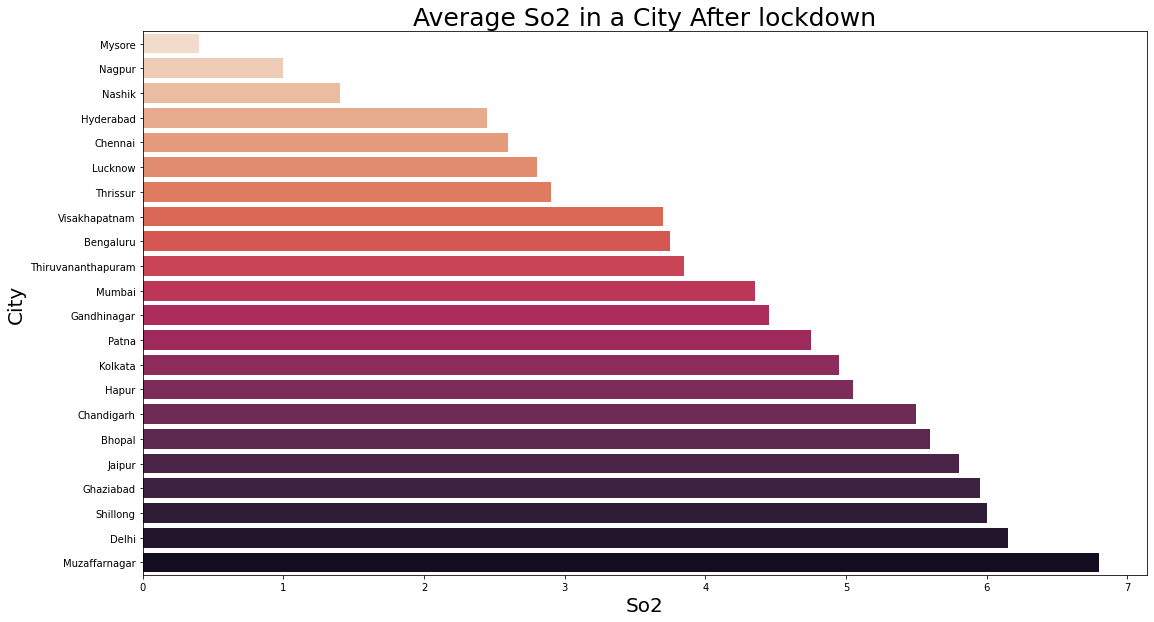

In [45]:
fig= plt.figure(figsize=(18, 10))
sns.barplot(x='so2', y=state_wise_max_so2.index, data=state_wise_max_so2, palette = 'rocket_r')
plt.title("Average So2 in a City After lockdown",fontsize = 25)
plt.xlabel("So2",fontsize = 20)
plt.ylabel("City",fontsize = 20)
plt.show()

##### Good range for So2 –> 10 – 35
##### As we can see above “Muzzafarnagar”(UP) is ahead in avg So2 count (6.8) ppbv after the Covid-19 lockdown followed by “Delhi” the metro city with 6.15, “Shillong”(Meghalaya) (6) ppbv and “Ghaziabad”(UP) with 5.95

In [46]:
df2[['City','no2']].dropna().groupby(by = 'City').median().sort_values(by='no2')

,no2
Specie,
City,
Shillong,1.70
Chennai,3.20
Thrissur,4.50
Thiruvananthapuram,4.95
Muzaffarnagar,5.85
Mumbai,6.30
Gandhinagar,6.40
Mysore,6.90


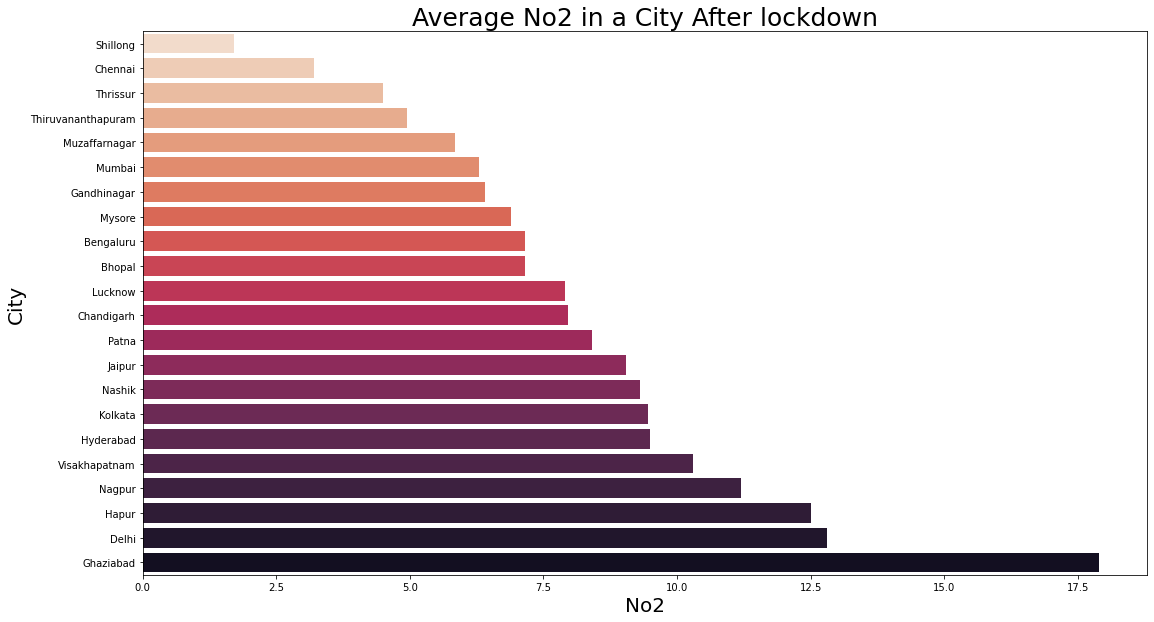

In [47]:
# Avg. No2 concentration in a city

state_wise_max_no2 = df2[['City','no2']].dropna().groupby(by = 'City').median().sort_values(by='no2')
fig= plt.figure(figsize=(18, 10))
sns.barplot(x='no2', y=state_wise_max_no2.index, data=state_wise_max_no2, palette = 'rocket_r')
plt.title("Average No2 in a City After lockdown",fontsize = 25)
plt.xlabel("No2",fontsize = 20)
plt.ylabel("City",fontsize = 20)
plt.show()

##### Good range for No2 –> 10 – 25
##### As we can see above “Ghaziabad”(UP) is ahead in avg No2 count (17.90) ppbv after the Covid-19 lockdown followed by “Delhi” (12.80) ppbv and"Hapur" (12.50) 

In [48]:
df2[['City','pm25']].dropna().groupby(by = 'City').median().sort_values(by='pm25')

,pm25
Specie,
City,
Thrissur,47.0
Mysore,65.0
Chennai,68.0
Visakhapatnam,70.0
Thiruvananthapuram,77.0
Nagpur,77.0
Bengaluru,85.5
Chandigarh,86.5


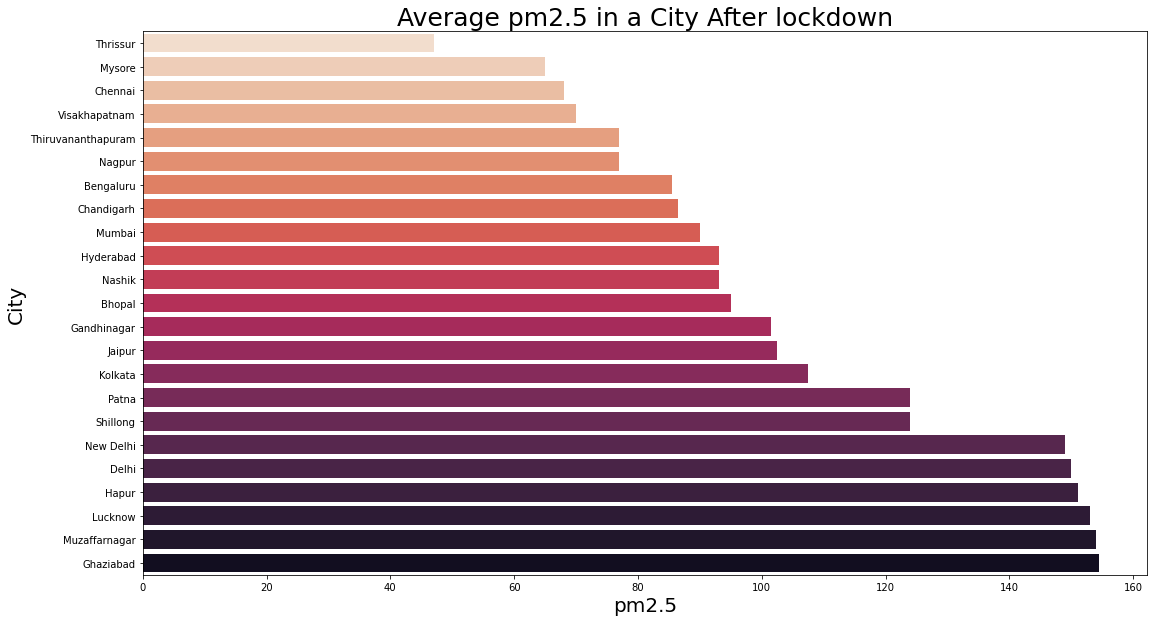

In [49]:
# Avg. pm25 concentration in a city

state_wise_max_pm25 = df2[['City','pm25']].dropna().groupby(by = 'City').median().sort_values(by='pm25')
fig= plt.figure(figsize=(18, 10))
sns.barplot(x='pm25', y=state_wise_max_pm25.index, data=state_wise_max_pm25, palette = 'rocket_r')
plt.title("Average pm2.5 in a City After lockdown",fontsize = 25)
plt.xlabel("pm2.5",fontsize = 20)
plt.ylabel("City",fontsize = 20)
plt.show()

##### As we can see above “Ghaziabad”(UP) is ahead in avg Pm2.5 with count (154.5) ppbv after the Covid-19 lockdown followed by “Muzzafarnagar” (154) ppbv ,”Lucknow” (153), "Hapur" (151) and “Delhi” at (150).
##### Since the respiratory affect depends on the pm2.5 therefore Ghaziabad is worst city according to respiration point of view

### 
### Time Varying Analysis from 2019 - 2021

In [50]:
df1.head()

,Date,City,Country,no2,pm25,so2,temperature
Specie,,,,,,,
0,2018-12-31,Bengaluru,IN,16.1,148.0,2.4,23.8
1,2018-12-31,Bhopal,IN,14.9,162.0,10.9,29.8
2,2018-12-31,Chandigarh,IN,9.0,168.0,2.2,14.3
3,2018-12-31,Chennai,IN,5.2,132.0,5.8,25.1
4,2018-12-31,Delhi,IN,31.5,363.0,8.3,12.3


In [51]:
df2.head()

,Date,City,Country,no2,pm25,so2,temperature
Specie,,,,,,,
0,2020-02-13,Bengaluru,IN,14.3,103.0,3.7,NaN
1,2020-02-13,Bhopal,IN,15.1,142.0,7.0,NaN
2,2020-02-13,Chandigarh,IN,8.5,125.0,5.1,NaN
3,2020-02-13,Chennai,IN,8.4,121.0,4.4,NaN
4,2020-02-13,Delhi,IN,17.1,165.0,7.6,NaN


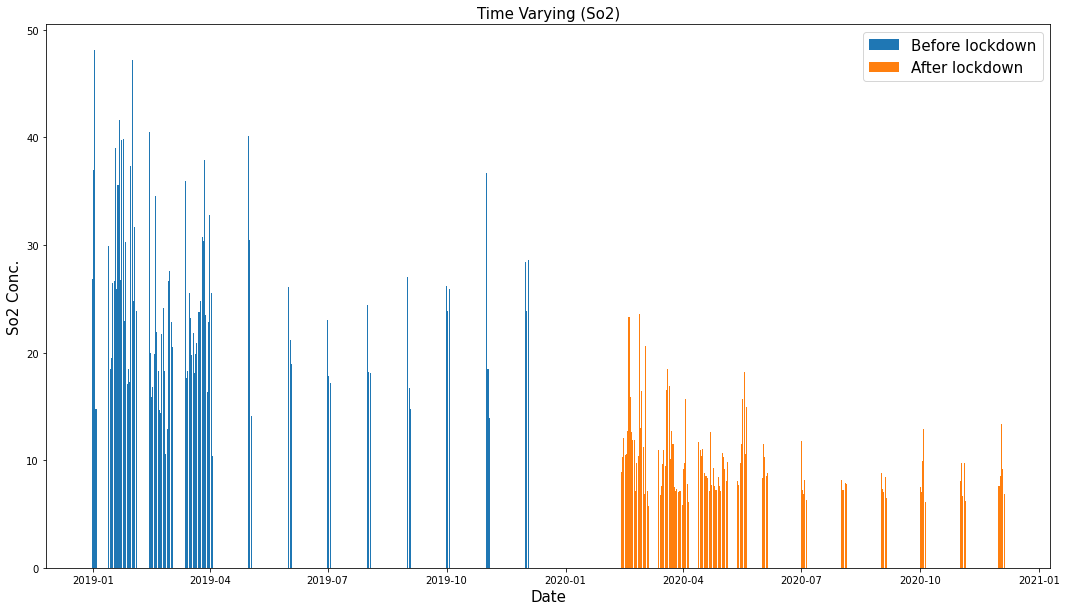

In [52]:
fig=plt.figure(figsize=(18,10))
plt.bar(df1["Date"] , df1["so2"])
plt.bar(df2["Date"] , df2["so2"])
plt.xlabel("Date", fontsize = 15)
plt.ylabel("So2 Conc.",fontsize = 15)
plt.title("Time Varying (So2)",fontsize = 15)
plt.legend(['Before lockdown','After lockdown'],loc = 'upper right',fontsize = 15)

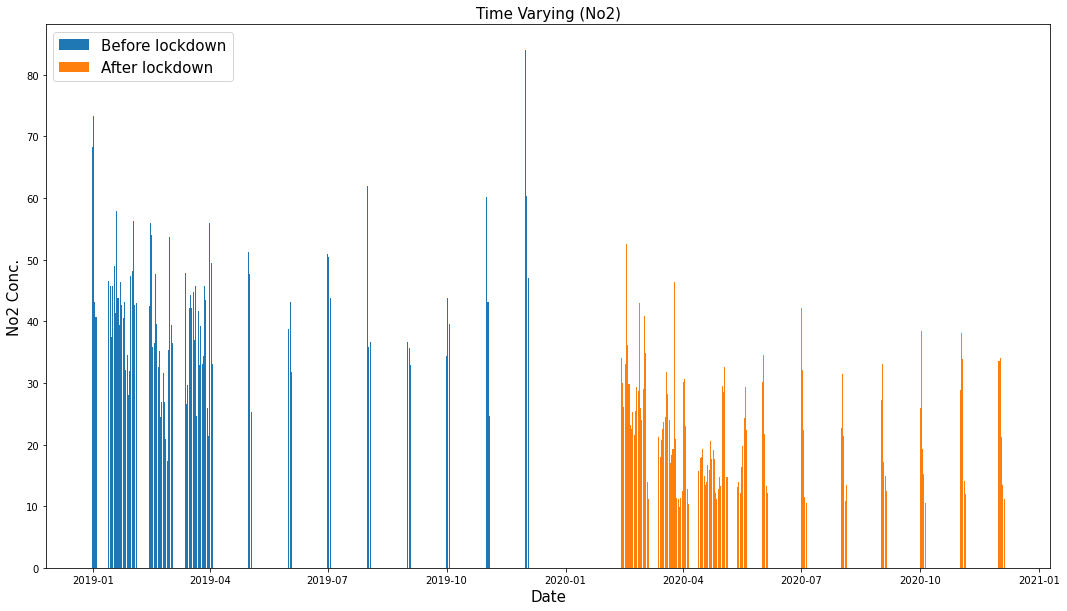

In [53]:
fig=plt.figure(figsize=(18,10))
plt.bar(df1["Date"] , df1["no2"])
plt.bar(df2["Date"] , df2["no2"])
plt.xlabel("Date", fontsize = 15)
plt.ylabel("No2 Conc.", fontsize = 15)
plt.title("Time Varying (No2)", fontsize = 15)
plt.legend(['Before lockdown','After lockdown'],loc = 'upper left',fontsize = 15)

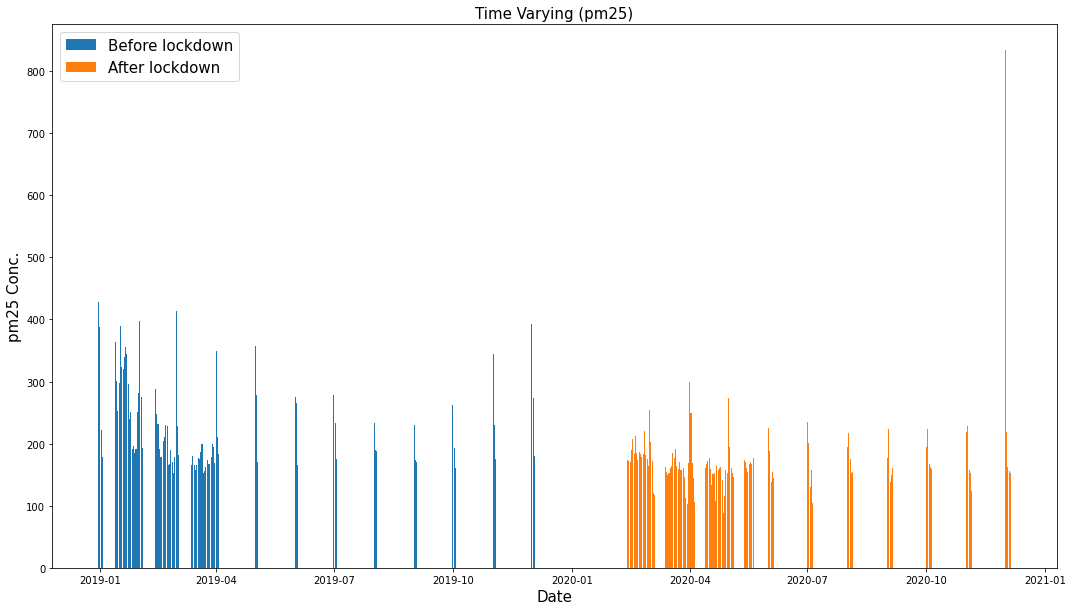

In [54]:
fig=plt.figure(figsize=(18,10))
plt.bar(df1["Date"] , df1["pm25"])
plt.bar(df2["Date"] , df2["pm25"])
plt.xlabel("Date", fontsize = 15)
plt.ylabel("pm25 Conc.", fontsize = 15)
plt.title("Time Varying (pm25)", fontsize = 15)
plt.legend(['Before lockdown','After lockdown'],loc = 'upper left',fontsize = 15)

### Conclusion
##### These are the insights after lockdown. As these were the cases around the Cities after lockdown period , many cities already were in bad condition before but now they have got better with 10-12 % ! The north-west states were Bad (Ghaziabad , Delhi ,Gandhinagar and Patna ) .Many measures were taken after the lockdown to decrease the pollution and YES, maybe we have succeded to decrease the count of pollutant!

## Comparison

##### SO2 :  Before : Gandhinagar was at 23 and Bihar at 13.90   //   After :  Gandhinagar is reduced to 4.45 and Bihar at 4.75 , which is tremendous!

##### No2 : Before : Kolkata 30.4 , Gandhinagar at 29.9 and Delhi at 21.9 ppbv //After : Kolkata at 9.45 , Gandhinagar at 6.40 , Delhi at 12.80 ppbv
##### “Gandhinagar has brought some good changes in the value which is commendabale”


##### PM2.5 : Before : Delhi at 194, Patna at 181 and Ghaziabad  at 178 ppbv // After : New Delhi at 150 , Patna at 124 and Ghaziabad  at 154.5  ppbv
##### “Delhi public has made some good effort in dropping the value from 194 to 150 , all because of the co-operation after lockdown !”


##### So, now the question comes - Is lockdown really helpful in reducing air pollution in India ?
##### The answer is "YES",from the above insights we can see that due to lockdown since the crowd on road reduces drastically, the conc. of harmful pollutants like So2,No2,pm2.5 also reduces in various indian cities
##### If we look closely into the graph , majority of the location with bad pollution control are north western area , where the literacy rate <60 % , according to that in order to maintain the pollution control level which we achieved after lockdown, public in nortwestern area should be made aware about the pollution caused form their vehicle and from industries , they can take measure like : - reduce the number of trips you take in your car, avoid burning leaves, trash, and other materials, take the Vehicle Emission test every 6 months